In [ ]:
import scipy.integrate as integr
import numpy as np
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (9, 3)
rect_pics = (3, 3)

Численное решение + фазовый портрет

In [ ]:
def plot_solution(y1, y2, time, color1 = "b", color2 = "red"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "x")
    plt.plot(time, y2, c = color2, label = "y")
    plt.xlabel("time")
    plt.ylabel("x, y")
    plt.title(f"Численное решение системы Ван-дер-Поля")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_phase_portrait(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)

    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Фазовый портрет системы Ван-дер-Поля")
    plt.grid(True)
    plt.show()

Функция системы Ван-дер-Поля

In [ ]:
#def vanderpol(y, t, mu=0.1):
#    y1, y2 = y
#    dy1, dy2 = y2, - mu * y2 * ((y1 ** 2) - 1) - y1
#    return [dy1, dy2]

In [ ]:
# def vanderpol(y, t, mu=0.1):
#   y1, y2 = y
#   dy1, dy2 = y2, - mu * y2 * ((y1 ** 2) - 1) - y1
#   return [dy1, dy2]


#def vanderpol(y, t, mu=0.1):
#  y1, y2 = y
#  dy1, dy2 = y2(1 - 3*y1**2 -2*y2) -y1 #y2, - mu * y2 * ((y1 ** 2) - 1) - y1
#  return [dy1, dy2]

In [ ]:
import sympy as sp

# Define the variables
y1, y2 = sp.symbols('y1 y2')
t = sp.symbols('t')
mu = sp.symbols('mu', positive=True)

# Define the Van der Pol oscillator equations
dy1, dy2 = y2, y2*(1 - 3*y1**2 -2*y2) - y1

# Find the equilibria by solving the system of equations
equilibria = sp.solve((dy1, dy2), (y1, y2))

# Print the equilibria
print(equilibria)

[(0, 0)]


In [ ]:
for eq in equilibria:
    y1_eq, y2_eq = eq
    J = sp.Matrix([[dy1.diff(y1), dy1.diff(y2)], [dy2.diff(y1), dy2.diff(y2)]]).subs({y1: y1_eq, y2: y2_eq})
    print(f"Якобиан {eq}: {J}")

    # Compute the eigenvalues of the Jacobian matrix
    eigenvalues = J.eigenvals()
    print(f"Собственные значения матрицы Якоби: {eigenvalues}")

Якобиан (0, 0): Matrix([[0, 1], [-1, 1]])
Собственные значения матрицы Якоби: {1/2 - sqrt(3)*I/2: 1, 1/2 + sqrt(3)*I/2: 1}


Анализ системы

In [ ]:
def analyze(f, nulls, starts, mu,time_end = 100):
    time = np.linspace(0, time_end, 5000)
    print(f'mu = {mu}')
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, (mu,))
        y1 = w[:, 0]
        y2 = w[:, 1]

        plot_solution(y1, y2, time)
        plot_phase_portrait(y1, y2, starts = [i], nulls = nulls)

Единственная особая точка данной системы: (*x**, *y**) = (0, 0).

Бифуркационное значение параметра *mu = 1*.

In [ ]:
def vanderpol(y, t, mu=1):
  y1, y2 = y
  dy1, dy2 =y2, y2*(1 - 3*y1**2 -2*y2**2) -y1 * mu
  return [dy1, dy2]

In [ ]:
starts = [[0, 0],[1,1], [-1,1], [1,-1], [-1,-1]]

nulls = [[0,0]]

mu = 1
В точке [0, 0]


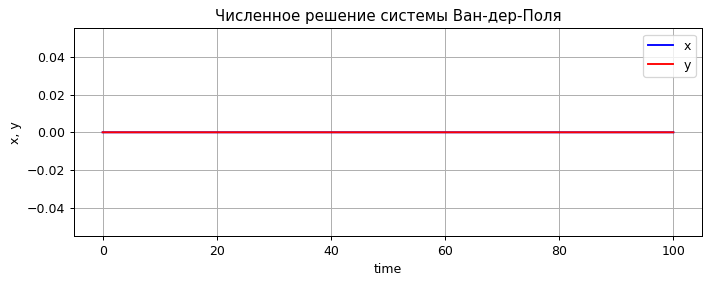

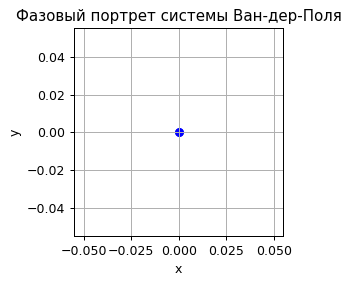

В точке [1, 1]


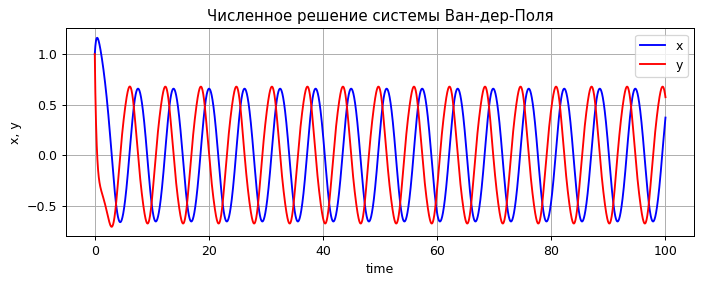

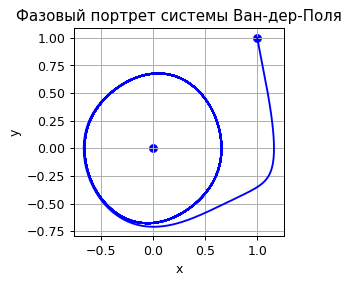

В точке [-1, 1]


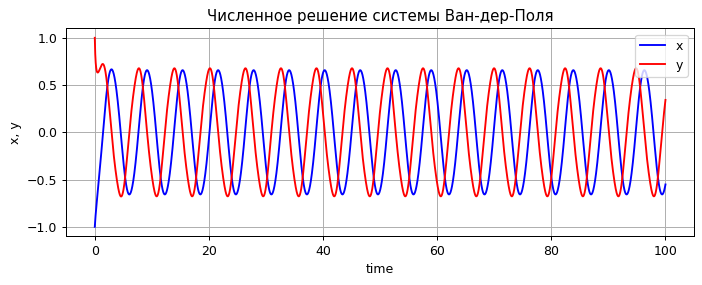

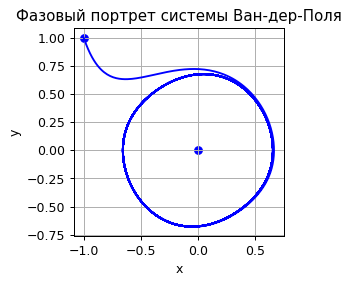

В точке [1, -1]


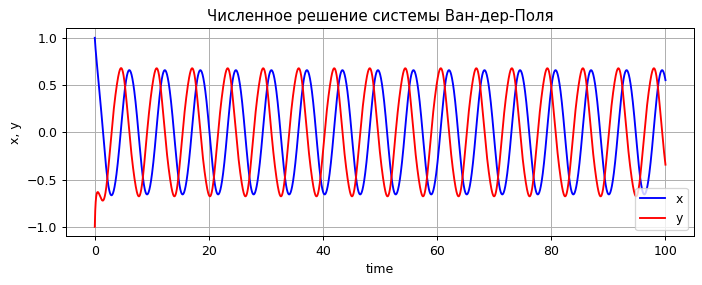

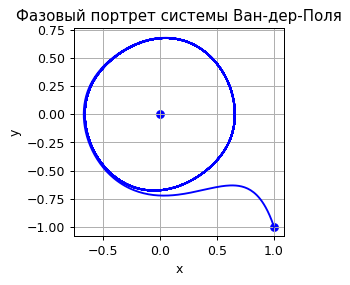

В точке [-1, -1]


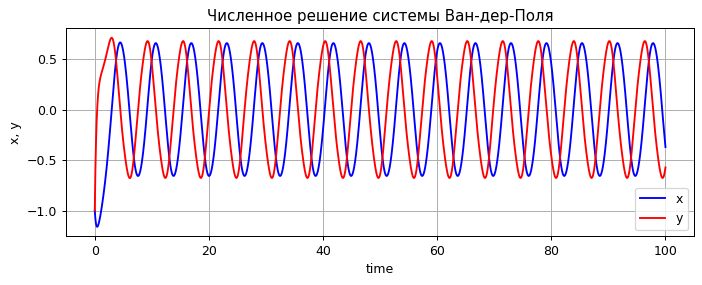

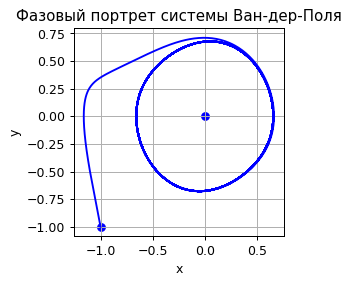

In [ ]:
analyze(vanderpol, nulls, starts, mu=1)

mu = 0.1
В точке [0, 0]


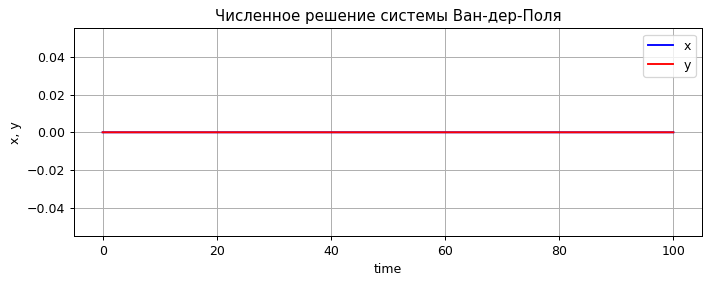

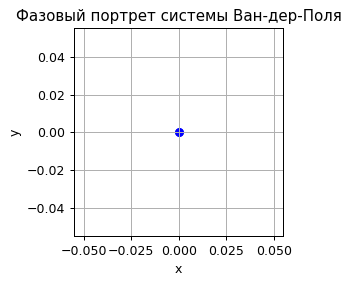

В точке [1, 1]


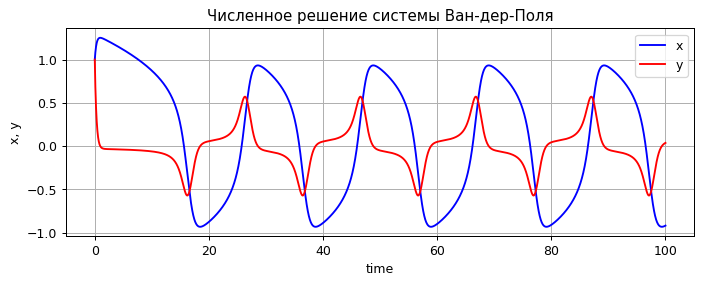

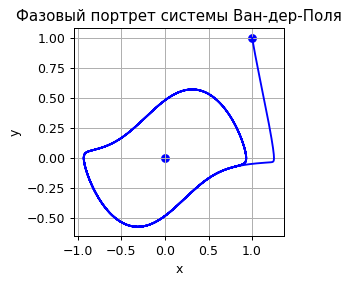

В точке [-1, 1]


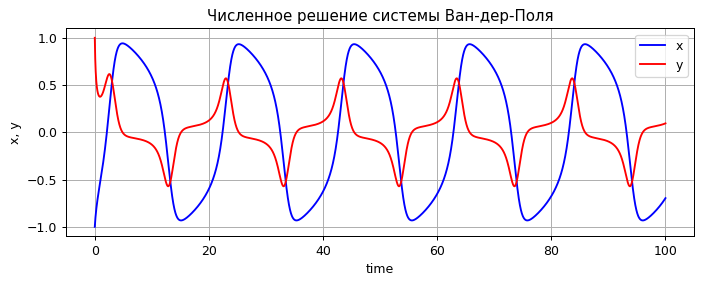

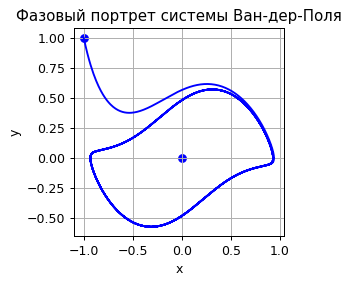

В точке [1, -1]


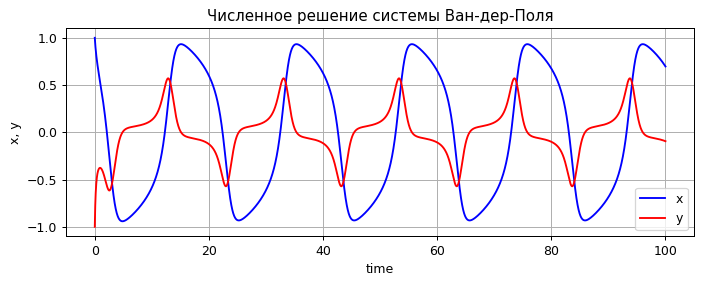

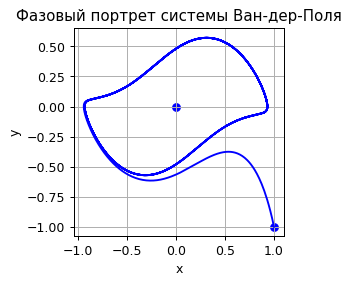

В точке [-1, -1]


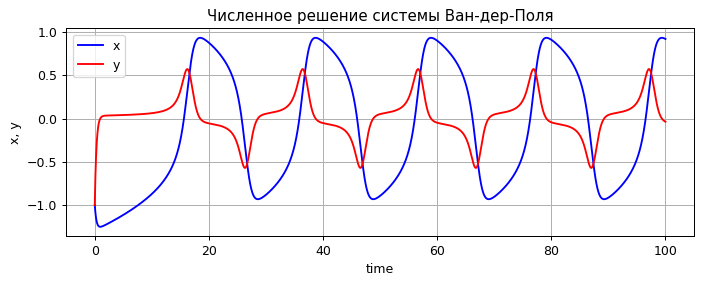

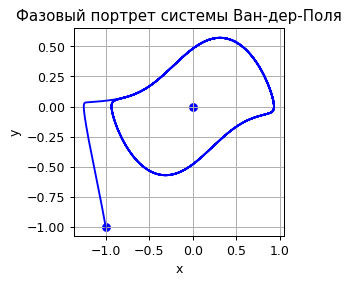

In [ ]:
analyze(vanderpol, nulls, starts, mu=0.1)

mu = 0.5
В точке [0, 0]


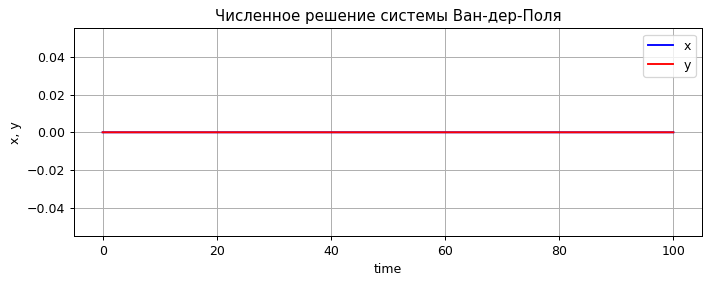

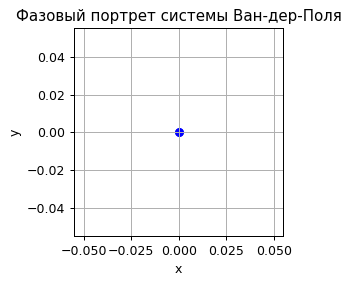

В точке [1, 1]


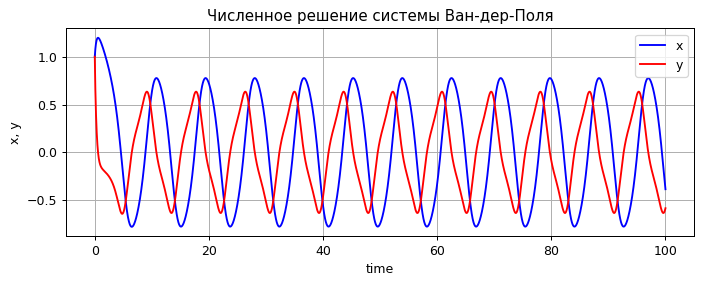

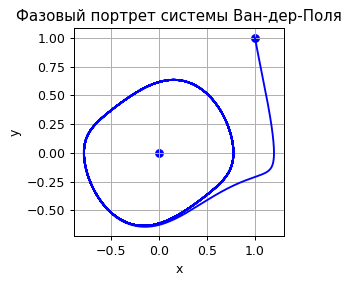

В точке [-1, 1]


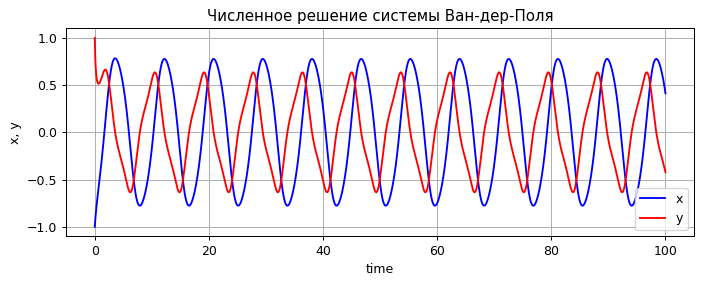

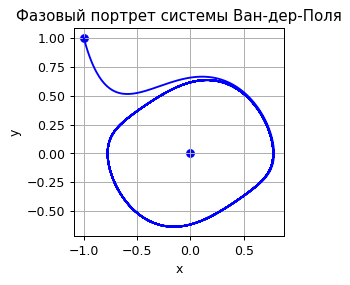

В точке [1, -1]


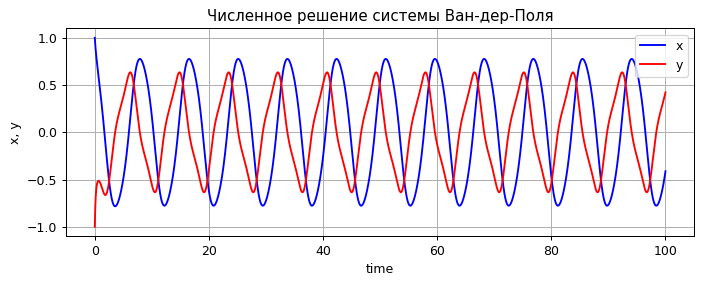

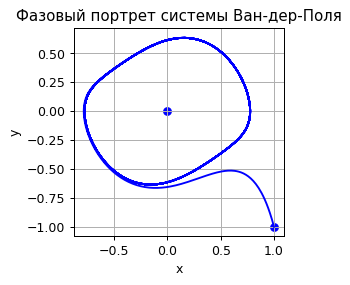

В точке [-1, -1]


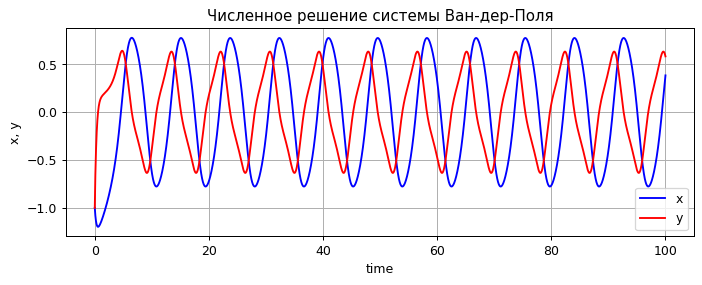

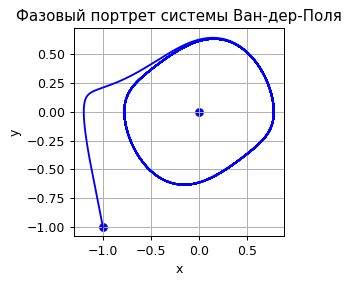

In [ ]:
analyze(vanderpol, nulls, starts, mu=0.5)

mu = 0.1
В точке [0, 0]


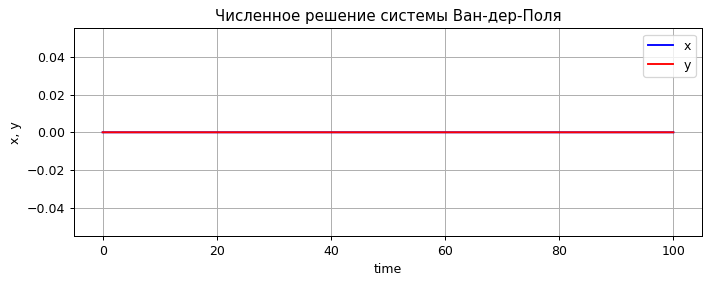

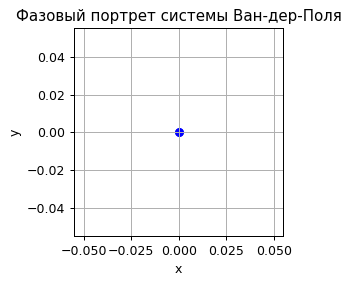

В точке [1, 1]


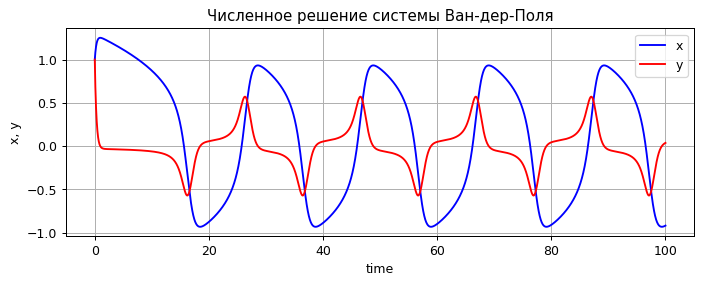

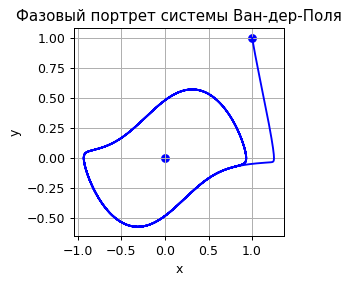

В точке [-1, 1]


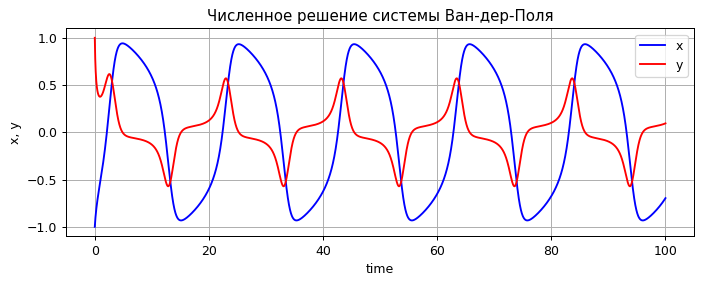

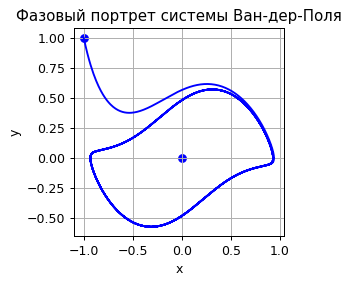

В точке [1, -1]


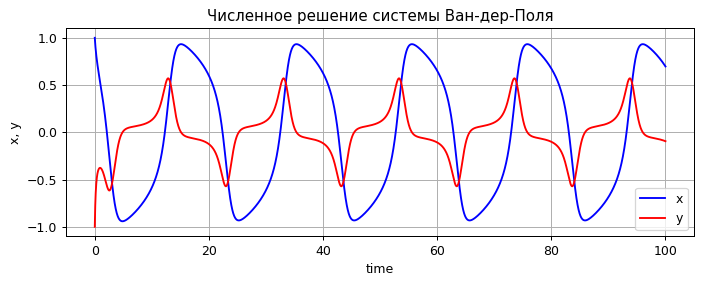

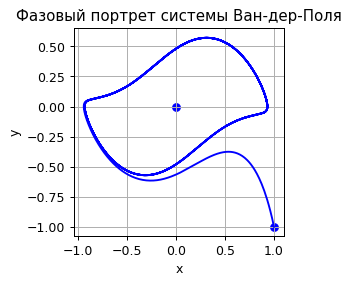

В точке [-1, -1]


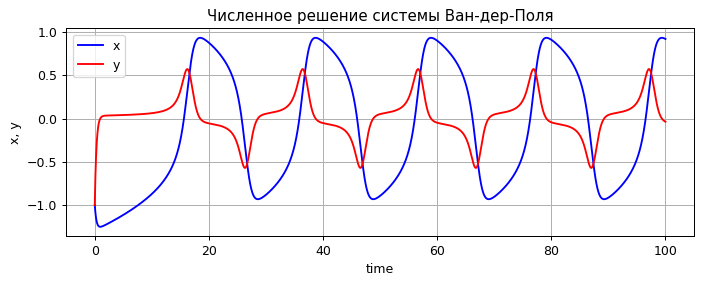

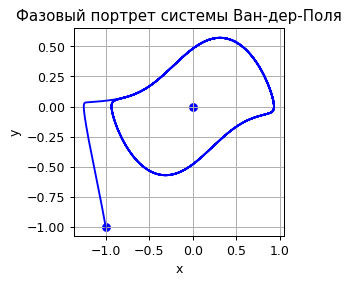

In [ ]:
analyze(vanderpol, nulls, starts, mu=0.1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59ee8af1-0df1-4daf-acee-59c415974c62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>